<strong style="color:red;">定常な時系列</strong>の特徴を表現するもっとも基本的な手段として共分散関数を説明する。

自己共分散関数は時系列の過去の変動との関連の強さを表現したものであり、相互共分散関数は他の時系列の変動との関連の強さを表現したものである。これらの共分散関数によって時系列の特徴をある程度捉えることが可能となり、さらに、スペクトルの推定や時系列モデルの推定にも利用される。

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

In [4]:
from datetime import datetime
import pandas_datareader.data as web

日経255平均株価 = web.DataReader("NIKKEI225", "fred", datetime(1988, 1, 4), datetime(1993, 12, 30))

/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


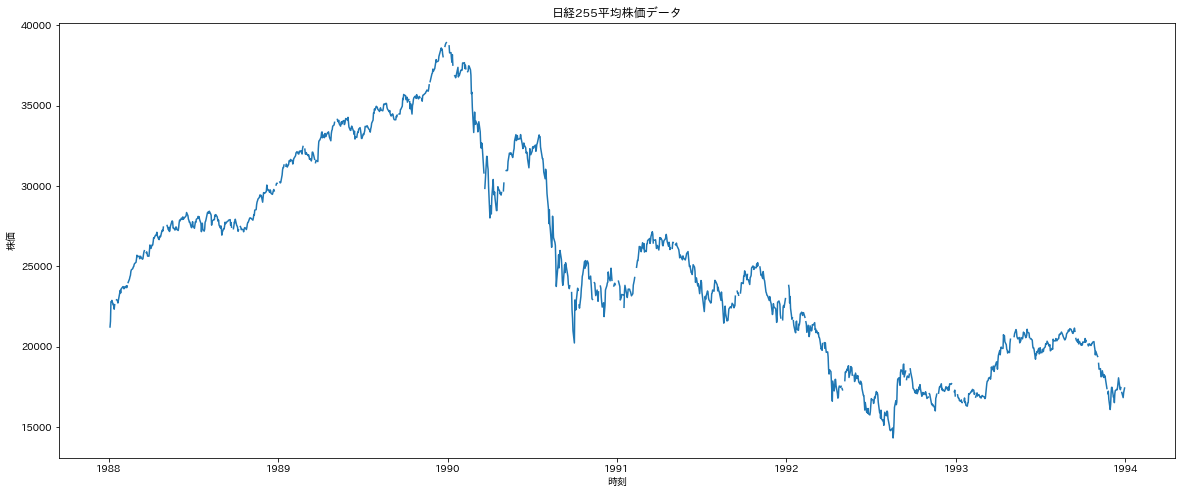

In [5]:
plt.figure(figsize=(20, 8))
plt.title('日経255平均株価データ')
plt.plot(日経255平均株価)
plt.ylabel('株価')
plt.xlabel('時刻')
plt.show()

# 時系列の分布と定常性

解析対象となる時系列データの特徴をある程度把握するために、以下の図を描画してみることが重要である。

 - $y_{n}$の分布
 - $y_{n}$と$y_{n - k}$の同時分布

In [ ]:
plt.title('$y_{n}$の分布')
plt.hist(日経255平均株価, bins=50)
plt.show()

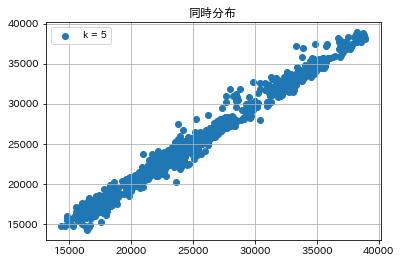

In [16]:
k = 5

plt.title('同時分布')
plt.scatter(日経255平均株価, 日経255平均株価.shift(k), label='k = {}'.format(k))
plt.grid()
plt.legend()
plt.show()

## 共分散

時系列を$\left\{ y_{1}, \cdots, y_{N} \right\}$とするとき、$y_{n}$の期待値

$$
{\mu}_{n} = \mathrm {E}\left( y_{n} \right)
$$

を時系列$y_{n}$の<strong>平均値関数</strong>(mean value fucntion)と呼ぶことにする。

また、時系列$y_{n}$と時刻を$k$だけシフトした$y_{n - k}$との共分散

$$
\mathrm {Cov}\left(y_{n}, y_{n-k}\right) = \mathrm {E}\left[ \left( y_{n} - \mu_{n} \right) \left( y_{n-k} - \mu_{n-k} \right) \right]
$$

を時系列$y_{n}$の<strong>自己共分散</strong>(autocovariance)と呼ぶ。とくに、$k = 0$とおくと時系列の分散関数$\mathrm {Var}\left(y_{n}\right)$が得られる。

> ただし、平均や共分散が時間と共に変化する非定常時系列の解析にはより高度な解析法が必要となるので、そのような場合は8章以降にまわし、当面は<strong style="color:red;">平均、分散、共分散が時間をシフトしても変化しない場合を考えることにする</strong>。
> 
> すなわち、$\ell$を時間のシフト量を表す任意の整数とするとき
> 
> $$
\begin{eqnarray}
\mathrm {E}\left( y_{n} \right) & = & \mathrm {E}\left( y_{n-\ell} \right) \\
\mathrm {Var}\left( y_{n} \right) & = & \mathrm {Var}\left( y_{n-\ell} \right) \\
\mathrm {Cov}\left( y_{n}, y_{m} \right) & = & \mathrm {Cov}\left( y_{n - \ell}, y_{m - \ell} \right)
\end{eqnarray}
$$
> 
> が成り立つものと仮定する。

## 同時確率密度関数

平均、分散、共分散関数だけで常にその特徴を捉えられるわけではない。一般には、$y_{1}, \cdots, y_{N}$の<strong style="color:blue;">同時確率密度関数</strong>$f\left(y_{1}, \cdots, y_{N}\right)$を調べる必要がある。

そのためには、任意の整数$k$および任意の時刻$i_{1} < i_{2} < \cdots < {i}_{k}$について、$y_{i_{1}}, \cdots, y_{i_{k}}$の同時確率密度関数

$$
f\left(y_{i_{1}}, \cdots, y_{i_{k}}\right)
$$

を定めればよい。

 - とくに、この分布が$k$変量の正規分布で表される場合には、<strong style="color:blue;">ガウス型時系列</strong>と呼ばれる。
 - 正規分布は平均と分散共分散行列によって完全に決定されるので、ガウス型時系列の特徴は平均ベクトルと分散共分散行列を求めることによって完全に捉えることができる。

## 強定常と弱定常

ある時系列の分布が、時間のシフトに関し不変で、その確率分布を時間軸方向に移動しても変化しないとき、「その時系列は<strong>強定常</strong>(strongly stationary)である」といわれる。

すなわち、時系列が強定常であるとは、任意の時間シフト量$\ell$および任意の$i_{1}, \cdots, i_{k}$について

$$
f\left( y_{i_{1}}, \cdots, y_{i_{k}} \right) = f\left( y_{i_{1} - \ell}, \cdots, y_{i_{k} - \ell} \right)
$$

が成り立つことである。

 - ガウス型時系列については、弱定常性と強定常性は同じである。

---

# 定常時系列と自己共分散関数

<strong style="color:red;">時系列に定常性を仮定すると</strong>、平均値関数$\mu_{n}$は時刻$n$に依存しない一定の値になるので

$$
\mu = \mathrm {E}\left( y_{n} \right)
$$

と表し、時系列$y_{n}$の平均と呼ぶ。また、$y_{n}$と$y_{n - k}$の共分散$\mathrm {Cov}\left( y_{n}, y_{n-k} \right)$は時間差$k$だけに依存する量となるので

$$
C_{k} = \mathrm {Cov}\left( y_{n}, y_{n-k} \right) = \mathrm {E}\left[ \left( y_{n} - \mu \right) \left( y_{n-k} - \mu \right) \right]
$$

と表し、<strong style="color:blue;">定常時系列の自己共分散関数</strong>(autocovariance function)という。

 - $k$ : ラグ(lag)とも呼ばれる
 - $k=0$のときには、自己共分散関数は$y_{n}$の分散に等しい。
 - 自己共分散関数は偶関数($C_{\ell} = C_{-\ell}$)で$\left| C_{k} \right| \le C_{0}$が成り立つ。

## 自己相関関数

$y_{n}$と$y_{n - k}$の相関係数

$$
R_{k} = \frac {\mathrm {Cov}\left( y_{n}, y_{n-k} \right)}{\sqrt {\mathrm {Var}\left( y_{n} \right) \mathrm {Var}\left( y_{n-k} \right) }}
$$

をラグ$k$の関数と見なしたものを<strong style="color:blue;">自己相関関数</strong>(autocorrelation function)と呼ぶ。

<strong style="color:red;">定常時系列の場合</strong>には、$\mathrm {Var}\left( y_{n} \right) = \mathrm {Var}\left( y_{n-k} \right) = C_{0}$が成り立つことから、自己相関関数は自己共分散関数を用いて

$$
R_{k} = \frac {C_{k}}{C_{0}}
$$

と簡単に表現することができる。

## 白色雑音

時系列$y_{n}$が相関のない確率変数の実現値で、その自己共分散関数が

$$
C_{k} = \begin{cases}  
\sigma^{2}, \quad k = 0 \textrm {のとき} \\
0, \quad k \neq 0 \textrm {のとき}
\end{cases}
$$

を満たすとき、分散${\sigma}^{2}$の白色雑音(ホワイトノイズ)と呼ばれる。

## 自己共分散関数と自己相関関数の推定

定常時系列$\left\{y_{1}, \cdots, y_{N}\right\}$が与えられたとき、平均$\mu$、自己共分散関数$C_{k}$および自己相関関数$R_{k}$の推定値は次の式により求められる。

$$
\begin{eqnarray}
\hat {\mu} & = & \frac {1}{N} \sum _{n=1}^{N}{y_{n}}\\
{\hat {C}}_{k} & = & \frac {1}{N} \sum _{n=k+1}^{N}{ \left( y_{n} - \hat {\mu} \right)\left( y_{n-k} - \hat {\mu} \right) }\\
{\hat {C}}_{0} & = & \frac {1}{N} \sum _{n=1}^{N}{ \left( y_{n} - \hat {\mu} \right)^{2} }\\
{\hat {R}}_{k} & = & \frac {{\hat {C}}_{k}}{ {\hat {C}}_{0} }
\end{eqnarray}
$$

 - $\hat {\mu}$ : 標本平均
 - $\hat {C}_{k}$ : 標本自己共分散関数
 - ${\hat {R}}_{k}$ : 標本自己相関関数

---

# 多変量時系列と散布図

 - $\ell$ : 同時に観測された系列の数
 - $y_{n}\left(j\right) \quad (j=1, \cdots, \ell)$ : それぞれの時系列
 - $y_{n} = \left( y_{n}\left( 1 \right), \cdots, y_{n}\left( \ell \right) \right)^{T}$ : 多変量時系列は$\ell$次元のベクトルとなる

## ①図示

 - $y_{n}\left(j\right)$の分布
 - $y_{n}\left(j\right)$と$y_{n - k}\left(j\right)$の同時分布
 - $y_{n}\left(j\right)$と$y_{n}\left(i\right)$の同時分布
 - $y_{n}\left(j\right)$と$y_{n-k}\left(i\right)$の同時分布

## ②相互共分散関数/相互相関関数

**平均ベクトル**(mean vector)<br>

$$
\vec {\mu} = \left( \mu\left(1\right), \cdots, \mu\left(i\right), \cdots, \mu\left(\ell\right) \right)^{T}
$$

$$
\mu\left(i\right) = \mathrm {E}\left[ y_{n}\left(i\right) \right]
$$

**相互共分散関数**(cross-convariance function)<br>
時系列$y_{n}\left(i\right)$と時系列$y_{n-k}\left(j\right)$の共分散は

$$
\begin{eqnarray}
C_{k}\left(i,j\right) & = & \mathrm {Cov}\left( y_{n}\left(i\right), y_{n - k}\left(i\right) \right)\\
& = & \mathrm {E}\left\{ \left[ y_{n}\left(i\right) - \mu\left(i\right) \right] \left[ y_{n-k}\left(j\right) - \mu\left(j\right) \right]^{T} \right\}
\end{eqnarray}
$$

によって求められる。このとき、$\ell \times \ell$行列

$$
C_{k} = 
\begin{bmatrix} 
{ C }_{ k }\left( 1,1 \right)  & \cdots  & { C }_{ k }\left( 1,\ell  \right)  \\ 
\vdots  & \ddots  & \vdots  \\ 
{ C }_{ k }\left( \ell ,1 \right)  & \cdots  & { C }_{ k }\left( \ell ,\ell  \right)  
\end{bmatrix}
$$

はラグ$k$の相互共分散と呼ばれる。また、$C_{k}(k = 0, 1, 2, \cdots)$をラグ$k$の関数とみるとき<strong style="color:blue;">相互共分散関数</strong>と呼ばれる。

 - 相互共分散関数の対角成分$C_{k}\left(i,i\right)$は$i$番目の時系列$y_{n}\left(i\right)$の自己共分散関数となっている

**相互相関関数**(cross-correlation fucntion)<br>

時系列$y_{n}\left(i\right)$と$y_{n-k}\left(j\right)$の相関係数を

$$
\begin{eqnarray}
R_{k}\left(i, j\right) & = & \mathrm {Cov}\left( y_{n}\left(i\right), y_{n-k}\left(j\right) \right) \\
& = & \frac { C_{k}\left(i,j\right) }{ \sqrt { C_{0}\left(i,i\right) C_{0}\left(j,j\right) } }
\end{eqnarray}
$$

と表すとき

$$
R_{k} = \begin{bmatrix} 
R_{ k }\left( 1,1 \right)  & \cdots  & R_{ k }\left( 1,\ell  \right)  \\ 
\vdots  & \ddots  & \vdots  \\ 
R_{ k }\left( \ell ,1 \right)  & \cdots  & R_{ k }\left( \ell ,\ell  \right)  
\end{bmatrix}
$$

は<strong style="color:blue;">相互相関関数</strong>と呼ばれる

### 推定

長さ$N$の多変量時系列$\left\{ y_{1}\left( j \right), \cdots, y_{N}\left(j\right) \right\} \quad (j=1, \cdots, \ell)$が観測されたとき、平均$\mu\left(i\right)$、相互共分散関数$C_{k}\left( i,j \right)$および相互相関関数$R_{k}\left( i,j \right)$の推定値は次の式により求められる。

$$
\begin{eqnarray}
\hat {\mu}\left(i\right) & = & \frac {1}{N} \sum _{n=1}^{N}{y_{n}\left(i\right)} \\
\hat {C}_{k}\left(i,j\right) & = & \frac {1}{N} \sum _{n=k+1}^{N}{ \left[ y_{n}\left(i\right) - \hat {\mu}\left(i\right) \right]\left[ y_{n-k}\left(j\right) - \hat {\mu}\left(j\right) \right] }\\
\hat {C}_{0}\left(i,i\right) & = & \frac {1}{N} \sum _{n=1}^{N}{ \left[ y_{n}\left(i\right) - \hat {\mu}\left(i\right) \right]^{2} }\\
\hat {R}_{k}\left(i, j\right) & = & \frac { \hat {C}_{k}\left(i,j\right) }{ \sqrt { \hat {C}_{0}\left(i,i\right) \hat {C}_{0}\left(j,j\right) } }
\end{eqnarray}
$$